Import packages

In [1]:
from pylab import *
import yfinance
from pandas_datareader import data
from datetime import datetime
from pandas_datareader.data import DataReader
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from scipy.stats import norm
import numpy as np
import random
import pandas as pd
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.ticker as tkr
sns.set()

Plotting paramters

In [2]:
plt.rc('grid', linestyle=':', linewidth=0.5)
plt.rc('font', family='Bahnschrift')
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

ETH---set start date and end date

In [3]:
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)

Set the ticker

In [4]:
ticker = 'ETH-USD'

Import the price

In [5]:
ether = yfinance.download(ticker, start=start, end=end)
ether = pd.DataFrame(ether)

[*********************100%***********************]  1 of 1 completed


In [6]:
ether.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992


Plot adjusted close and volume

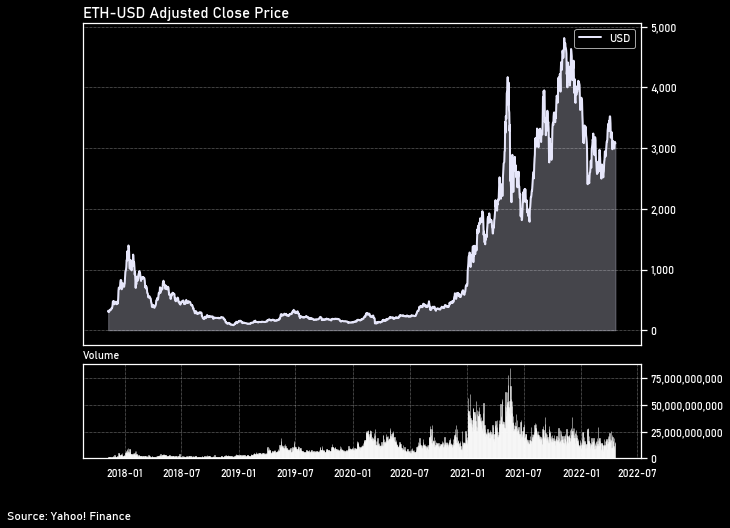

In [7]:
plt.figure(figsize=(10, 8))
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
top.fill_between(ether.index, ether['Adj Close'], color='lavender', alpha=0.3)
top.plot(ether.index, ether['Adj Close'], label='USD', color='lavender', linewidth=2)
top.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
top.legend()
bottom.bar(ether.index, ether['Volume'], color='white', alpha=0.5)
top.axes.get_xaxis().set_visible(False)
top.yaxis.tick_right()
top.set_title('ETH-USD Adjusted Close Price', loc='left', fontsize=15)
bottom.set_title('Volume', loc='left', fontsize=11)
bottom.ticklabel_format(axis="y", useOffset=False, style='plain')
bottom.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
bottom.yaxis.tick_right()
figtext(.02, .02, 'Source: Yahoo! Finance')
plt.show()

Create moving averages and rsi for timeperiods of 14, 30, 50, 100 and 200 days

In [8]:
for n in [14, 30, 50, 100, 200]:

    ether['mfi' + str(n)] = talib.MFI(high=ether['High'], low=ether['Low'], close=ether['Close'], volume=ether['Volume'],
                                    timeperiod=n)

    ether['ta' + str(n)] = talib.SMA(ether['Adj Close'].values, timeperiod=n)

    ether['rsi' + str(n)] = talib.RSI(ether['Adj Close'].values, timeperiod=n)

 Drop all na values

In [9]:
ether = ether.dropna()
ether['mfi14'].tail(5)

Date
2022-04-16    35.014754
2022-04-17    28.436336
2022-04-18    28.749989
2022-04-19    35.792555
2022-04-21    37.811680
Name: mfi14, dtype: float64

Plot RSI

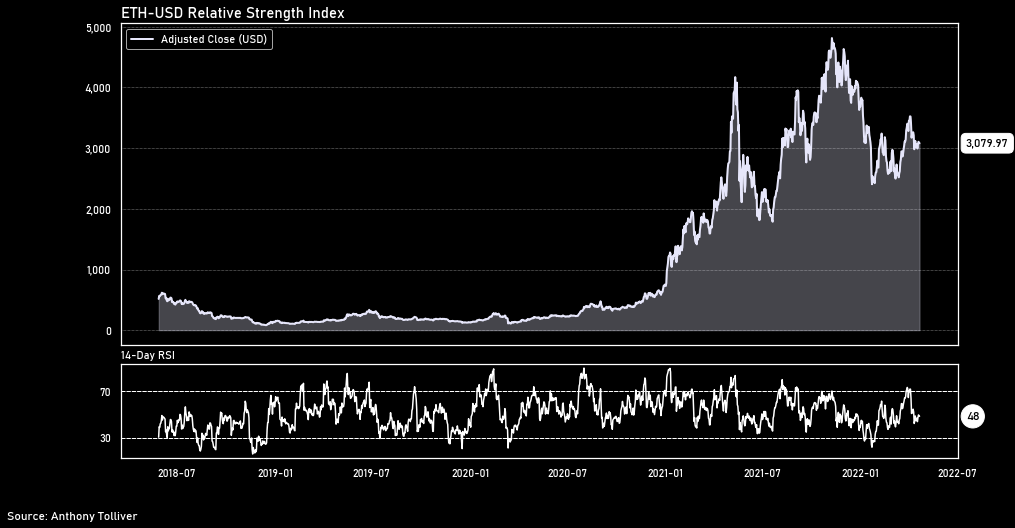

In [10]:
plt.figure(figsize=(15, 8))
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
top.fill_between(ether.index, ether['Adj Close'], color='lavender', alpha=0.3)
top.plot(ether.index, ether['Adj Close'], label='Adjusted Close (USD)', color='lavender', linewidth=2)
top.text(1.01, ether['Adj Close'].tail(1).values, ', '.join(ether['Adj Close'].tail(1).round(2).astype(float).apply(lambda x: f'{x:,}')), color='black', va='center', ha='left',
            bbox=dict(facecolor='w', boxstyle='round, pad=0.4'), transform=top.get_yaxis_transform())
top.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
top.legend()
bottom.plot(ether.index, ether['rsi14'], color='white')
bottom.set_yticks([30, 70])
bottom.axhline(y=70, linestyle='--', linewidth=1, dash_capstyle='round')
bottom.text(1.01, ether['rsi14'].tail(1).values, ', '.join(ether['rsi14'].tail(1).astype(int).apply(lambda x: f'{x:,}')), color='black', va='center', ha='left',
            bbox=dict(facecolor='w', boxstyle='circle, pad=0.4'), transform=bottom.get_yaxis_transform())
plt.grid(False)
plt.axhline(y=30, linestyle='--',  linewidth=1, dash_capstyle='round')
top.axes.get_xaxis().set_visible(False)
top.set_title('ETH-USD Relative Strength Index', loc='left', fontsize=15)
bottom.set_title('14-Day RSI', loc='left', fontsize=11)
figtext(.02, .02, 'Source: Anthony Tolliver')
plt.show()

Plot MFI

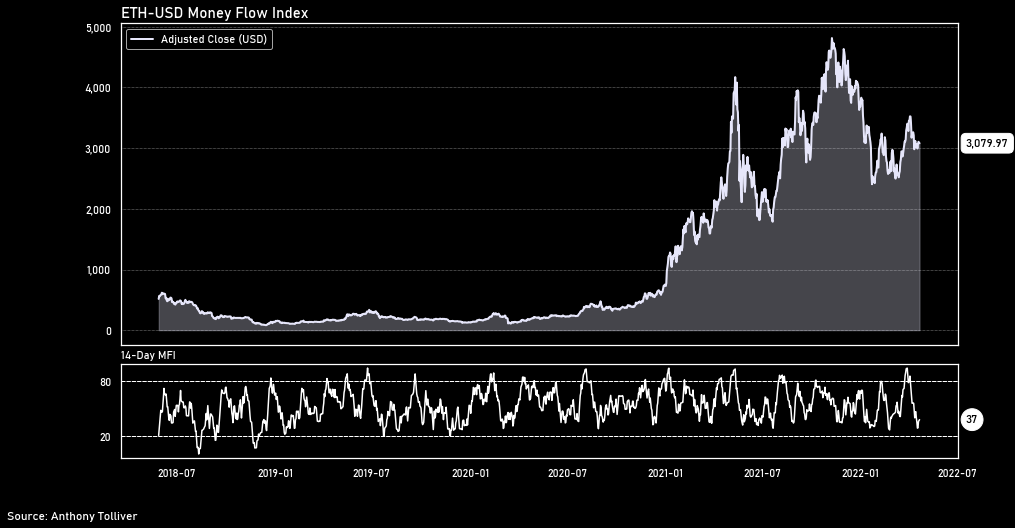

In [11]:
plt.figure(figsize=(15, 8))
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
top.fill_between(ether.index, ether['Adj Close'], color='lavender', alpha=0.3)
top.plot(ether.index, ether['Adj Close'], label='Adjusted Close (USD)', color='lavender', linewidth=2)
top.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
top.text(1.01, ether['Adj Close'].tail(1).values, ', '.join(ether['Adj Close'].tail(1).round(2).astype(float).apply(lambda x: f'{x:,}')), color='black', va='center', ha='left',
            bbox=dict(facecolor='white', boxstyle='round, pad=0.4'), transform=top.get_yaxis_transform())
top.legend()
bottom.plot(ether.index, ether['mfi14'], color='w')
bottom.set_yticks([20, 80])
bottom.axhline(y=80, linestyle='--', linewidth=1, dash_capstyle='round')
bottom.text(1.01, ether['mfi14'].tail(1).values, ', '.join(ether['mfi14'].tail(1).astype(int).apply(lambda x: f'{x:,}')), color='black', va='center', ha='left',
            bbox=dict(facecolor='white', boxstyle='circle, pad=0.4'), transform=bottom.get_yaxis_transform())
plt.grid(False)
plt.axhline(y=20, linestyle='--', linewidth=1, dash_capstyle='round')
top.axes.get_xaxis().set_visible(False)
top.set_title('ETH-USD Money Flow Index', loc='left', fontsize=15)
bottom.set_title('14-Day MFI', loc='left', fontsize=11)
figtext(.02, .02, 'Source: Anthony Tolliver')
plt.show()

Plot Moving Average

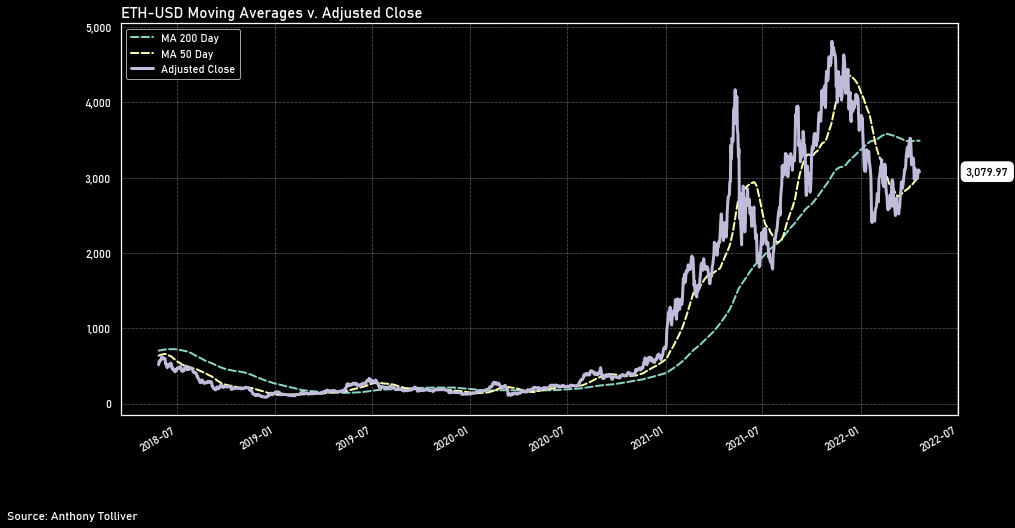

In [12]:
plt.figure(figsize=(15, 8))
ether['ta200'].loc['2017-08':].plot(label='MA 200 Day', legend=True, linewidth=2, linestyle='--', dash_capstyle='round')
ether['ta50'].loc['2017-08':].plot(label='MA 50 Day', legend=True, linewidth=2, linestyle='--', dash_capstyle='round')
ax = ether['Adj Close'].loc['2017-08':].plot(label='Adjusted Close', legend=True, linewidth=3)
ax.text(1.01, ether['Adj Close'].tail(1).values, ', '.join(ether['Adj Close'].tail(1).round(2).astype(float).apply(lambda x: f'{x:,}')), color='black', va='center', ha='left',
            bbox=dict(facecolor='w', boxstyle='round, pad=0.4'), transform=ax.get_yaxis_transform())
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
plt.title('ETH-USD Moving Averages v. Adjusted Close', loc='left', fontsize=15)
plt.xlabel('')
figtext(.02, .02, 'Source: Anthony Tolliver')
plt.show()

Create distribution plot

[*********************100%***********************]  1 of 1 completed


C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


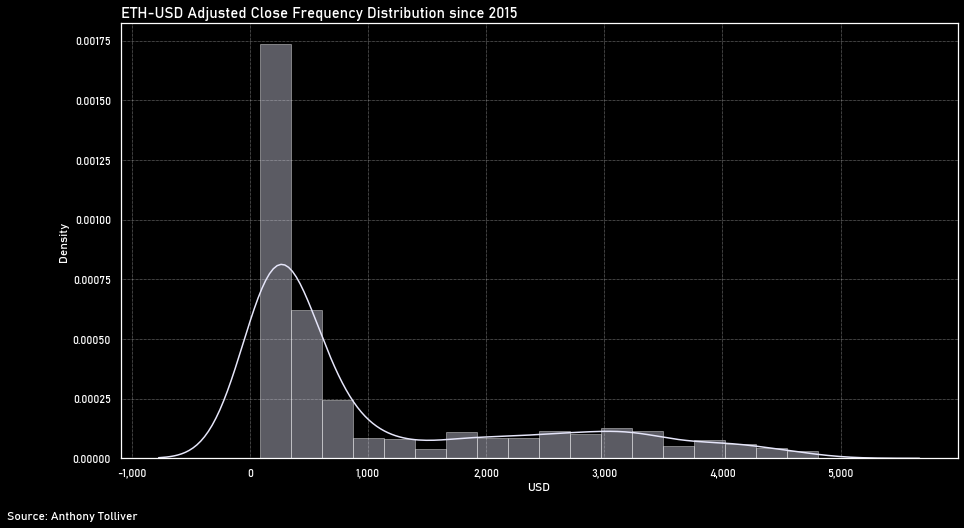

In [13]:
plt.figure(figsize=(15, 8))
start = date(2015, 1, 1)
ticker = 'ETH-USD'
mc = yfinance.download(ticker, start=start, end=end)['Adj Close']
mc = pd.DataFrame(mc)
sns.distplot(mc, color='lavender')
plt.gca().xaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
plt.title('ETH-USD Adjusted Close Frequency Distribution since 2015', loc='left', fontsize=15)
plt.xlabel('USD')
figtext(.02, .02, 'Source: Anthony Tolliver')
plt.show()

Explore adjusted closing price return

In [14]:
# Display most recent result
print('ETH-USD Latest')
print(mc.tail(1))

# Generate adjusted closing price stock return
chg_mc = mc.pct_change()
chg_mc = chg_mc.dropna()

# Display result
print('ETH-USD Price Percentage Change')
print(chg_mc.head(3))

ETH-USD Latest
             Adj Close
Date                  
2022-04-21  3079.97168
ETH-USD Price Percentage Change
            Adj Close
Date                 
2017-11-10  -0.067411
2017-11-11   0.051555
2017-11-12  -0.021523


Setting up random walk and Monte Carlo simulation

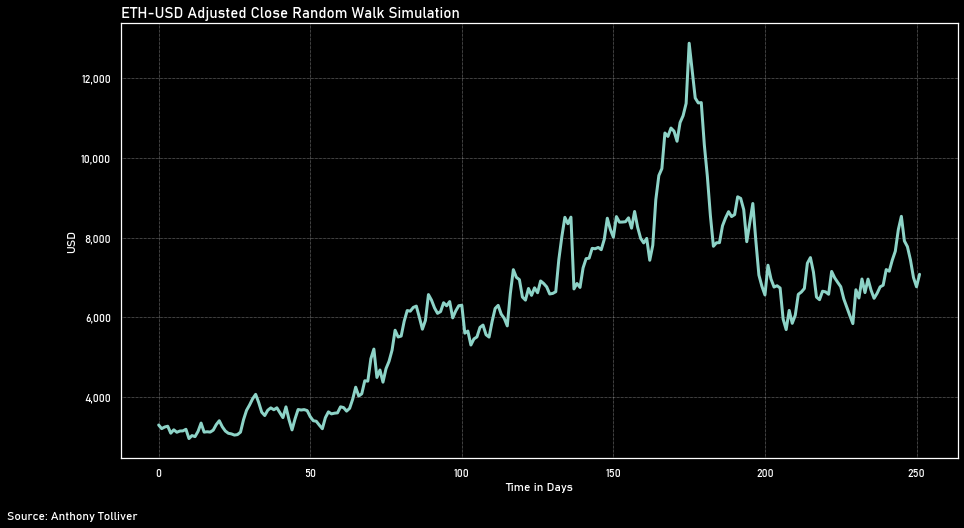

In [15]:
mu = np.mean(chg_mc)
vol = np.std(chg_mc)

# T is number of trading days per year
T = 252

# SO is initial stock price of most recent adjusted close data available
S0 = mc['Adj Close'].tail(1).values

# Add one to the random returns
rand_rets = np.random.normal(mu, vol, T) + 1

# Forecasted random walk
forecasted_values = S0 * rand_rets.cumprod()

# Plot the random walk
plt.figure(figsize=(15, 8))
plt.plot(range(0, T), forecasted_values, linewidth=3)
plt.title('ETH-USD Adjusted Close Random Walk Simulation', loc='left', fontsize=15)
figtext(.02, .02, 'Source: Anthony Tolliver')
plt.gca().yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
plt.ylabel('USD')
plt.xlabel('Time in Days')
plt.show()

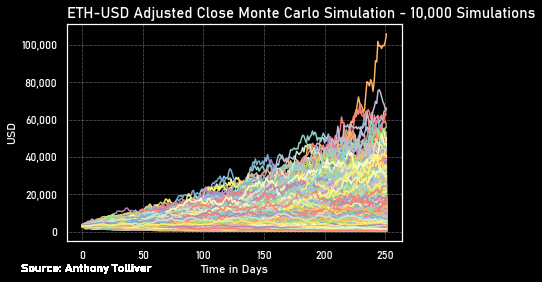

In [16]:
# Loop through 10,000 simulations
for i in range(10000):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1

    # Create the Monte carlo path
    forecasted_values = S0 * rand_rets.cumprod()

    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)
    plt.title('ETH-USD Adjusted Close Monte Carlo Simulation - 10,000 Simulations', loc='left', fontsize=15)
    plt.gca().yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: format(int(y), ',')))
    figtext(.02, .02, 'Source: Anthony Tolliver')
    plt.ylabel('USD')
    plt.xlabel('Time in Days')

# Show the simulations
plt.show()

Calculuate Value-at-Risk and Expected Shortfall

In [17]:
# Aggregate the returns
sim_returns = []

# Loop through 10,000 simulations to calculate Value-at-Risk (VaR) and Expected Shortfall (ES)
for i in range(10000):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)

    # Save the results
    sim_returns.append(rand_rets)

# Calculate the Annualized VaR(99)
var_99 = np.percentile(sim_returns, 1)
print('ETH-USD Annualized Value-at-Risk(99) ', round(100 * var_99, 4), '%')
mu1 = np.mean(sim_returns)
vol1 = np.std(sim_returns)
alpha = 0.01

# Calculate the Annualized ES(99)
cvar_99 = mu1 + vol1 * -norm.pdf(norm.ppf(1-alpha))/alpha
print('ETH-USD Annualized Expected Shortfall(99) ', round(100 * cvar_99, 4), '%')

ETH-USD Annualized Value-at-Risk(99)  -11.6066 %
ETH-USD Annualized Expected Shortfall(99)  -13.3398 %
